In [1]:
# Install all the necessary pacakges mentioned below using pip install <PACKAGE_NAME> from the command line
# Import all the necessary libraries
import sys
import numpy as np
import datetime as dt
import pandas as pd
import statsmodels.formula.api as sm

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

from IPython.display import display
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 200)

figw = 20
figh = 10
plt.rc('figure', figsize=(figw, figh))

# Create a variable with the directory path of dataset
datadir = '/home/ajoshi/'

# I. Data Collection and Cleaning

In [2]:
# Read the Home Games sheet data after gaining attendance information from https://www.basketball-reference.com
HTA_home = pd.read_excel(datadir+'Hornets Analyst Technical Assessment.xlsx', sheetname='Home Games')
HTA_home.head()

,Date,Season,Opponent,Game Result,Overall Wins By Season,Overall Losses By Season,Attendance
0,2014-10-29,2014-2015,Milwaukee Bucks,Win,0,0,19439
1,2014-11-01,2014-2015,Memphis Grizzlies,Loss,1,0,18133
2,2014-11-05,2014-2015,Miami Heat,Win,1,3,15874
3,2014-11-07,2014-2015,Atlanta Hawks,Win,2,3,15891
4,2014-11-17,2014-2015,Dallas Mavericks,Loss,4,6,15345


In [3]:
HTA_home.shape

(82, 7)

In [4]:
HTA_home.dtypes

Date                        datetime64[ns]
Season                              object
Opponent                            object
Game Result                         object
Overall Wins By Season               int64
Overall Losses By Season             int64
Attendance                           int64
dtype: object

In [5]:
# Read the Conference Reference sheet data
HTA_opponent = pd.read_excel(datadir+'Hornets Analyst Technical Assessment.xlsx', sheetname='Conference Reference')
HTA_opponent.head()

,Opponent,Conference
0,Atlanta Hawks,Eastern Conference
1,Boston Celtics,Eastern Conference
2,Brooklyn Nets,Eastern Conference
3,Chicago Bulls,Eastern Conference
4,Cleveland Cavaliers,Eastern Conference


In [6]:
HTA_opponent.shape

(29, 2)

In [7]:
HTA_opponent.dtypes

Opponent      object
Conference    object
dtype: object

In [8]:
# Creating a merged dataset by joining the opponent’s conference data with the Home Games data
HTA_merged=pd.merge(HTA_home,HTA_opponent,on='Opponent', how='left')
HTA_merged.head()

,Date,Season,Opponent,Game Result,Overall Wins By Season,Overall Losses By Season,Attendance,Conference
0,2014-10-29,2014-2015,Milwaukee Bucks,Win,0,0,19439,Eastern Conference
1,2014-11-01,2014-2015,Memphis Grizzlies,Loss,1,0,18133,Western Conference
2,2014-11-05,2014-2015,Miami Heat,Win,1,3,15874,Eastern Conference
3,2014-11-07,2014-2015,Atlanta Hawks,Win,2,3,15891,Eastern Conference
4,2014-11-17,2014-2015,Dallas Mavericks,Loss,4,6,15345,Western Conference


In [9]:
HTA_merged.shape

(82, 8)

In [10]:
# Calculating the cumulative number of HOME wins and losses per season at the time of each game
HTA_merged['Game_Result_Recoded_Win']=(HTA_merged['Game Result'].values=='Win')*1
HTA_merged['Game_Result_Recoded_Loss']=(HTA_merged['Game Result'].values=='Loss')*1
HTA_merged['Cumulative_Home_Wins_By_Season']=HTA_merged.groupby('Season')['Game_Result_Recoded_Win'].apply(lambda x: x.cumsum())
HTA_merged['Cumulative_Home_Losses_Season']=HTA_merged.groupby('Season')['Game_Result_Recoded_Loss'].apply(lambda x: x.cumsum())

In [11]:
# Calculating the Hornets’ overall win % at the time of each game and another column that calculates HOME win %
HTA_merged['Cumulative_Overall_Wins']=HTA_merged['Overall Wins By Season'].cumsum()
HTA_merged['Cumulative_Overall_Losses']=HTA_merged['Overall Losses By Season'].cumsum()
HTA_merged['Cumulative_Home_Wins']=HTA_merged['Game_Result_Recoded_Win'].cumsum()
HTA_merged['Cumulative_Home_Losses']=HTA_merged['Game_Result_Recoded_Loss'].cumsum()

HTA_merged['Overall_Win_Percentage']=100*(HTA_merged['Cumulative_Overall_Wins']/(HTA_merged['Cumulative_Overall_Wins']+HTA_merged['Cumulative_Overall_Losses']))
HTA_merged['Home_Win_Percentage']=100*(HTA_merged['Cumulative_Home_Wins']/(HTA_merged['Cumulative_Home_Wins']+HTA_merged['Cumulative_Home_Losses']))

HTA_merged.drop(['Cumulative_Overall_Wins','Cumulative_Overall_Losses','Cumulative_Home_Wins','Cumulative_Home_Losses','Game_Result_Recoded_Win','Game_Result_Recoded_Loss'],axis=1, inplace=True)

In [12]:
HTA_merged

,Date,Season,Opponent,Game Result,Overall Wins By Season,Overall Losses By Season,Attendance,Conference,Cumulative_Home_Wins_By_Season,Cumulative_Home_Losses_Season,Overall_Win_Percentage,Home_Win_Percentage
0,2014-10-29,2014-2015,Milwaukee Bucks,Win,0,0,19439,Eastern Conference,1,0,NaN,100.000000
1,2014-11-01,2014-2015,Memphis Grizzlies,Loss,1,0,18133,Western Conference,1,1,100.000000,50.000000
2,2014-11-05,2014-2015,Miami Heat,Win,1,3,15874,Eastern Conference,2,1,40.000000,66.666667
3,2014-11-07,2014-2015,Atlanta Hawks,Win,2,3,15891,Eastern Conference,3,1,40.000000,75.000000
4,2014-11-17,2014-2015,Dallas Mavericks,Loss,4,6,15345,Western Conference,3,2,40.000000,60.000000
5,2014-11-21,2014-2015,Orlando Magic,Loss,4,8,18126,Eastern Conference,3,3,37.500000,50.000000
6,2014-11-24,2014-2015,Los Angeles Clippers,Loss,4,10,17180,Western Conference,3,4,34.782609,42.857143
7,2014-11-26,2014-2015,Portland Trail Blazers,Loss,4,11,16972,Western Conference,3,5,32.786885,37.500000
8,2014-11-28,2014-2015,Golden State Warriors,Loss,4,12,19381,Western Conference,3,6,31.168831,33.333333
9,2014-12-03,2014-2015,Chicago Bulls,Loss,4,14,16887,Eastern Conference,3,7,29.473684,30.000000


In [13]:
# Fetching name of the Western Conference Team that had the highest attendance in 2015-16

HTA_merged_filt=HTA_merged.loc[(HTA_merged.Season=='2015-2016')&(HTA_merged.Conference=='Western Conference')]
str(HTA_merged_filt[HTA_merged_filt.Attendance==max(HTA_merged_filt.Attendance)].Opponent.values[0])

'Los Angeles Lakers'

# II. Probability & Statistical Analysis

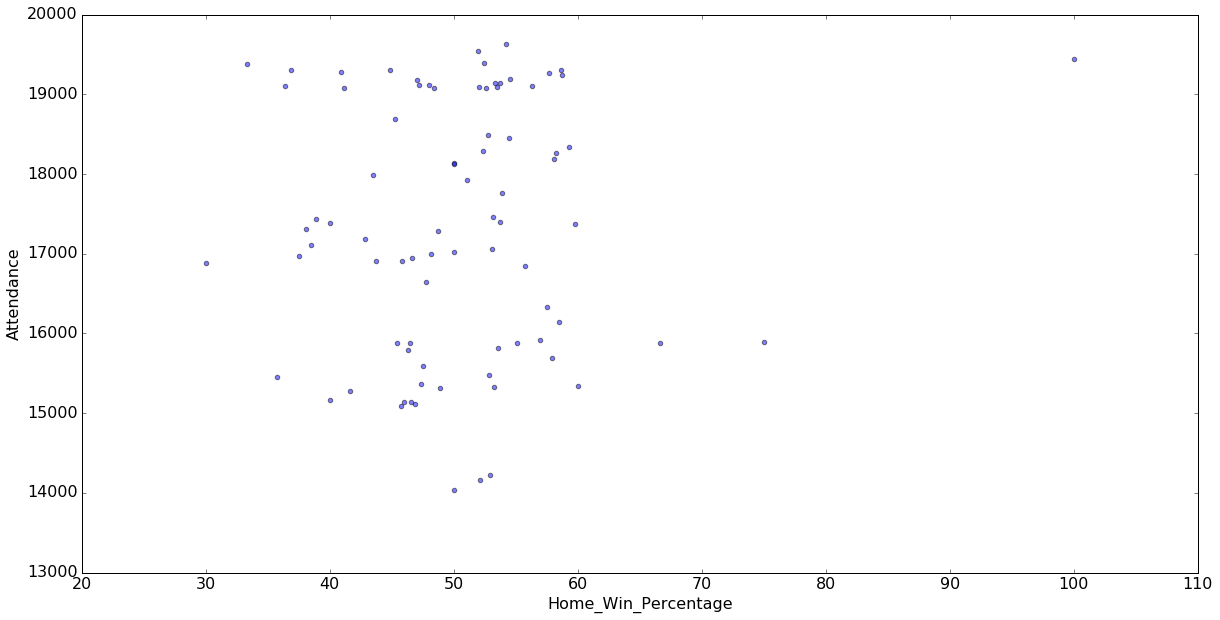

In [14]:
# Scatter plot to visualize the relationship between Home_Win_Percentage and Attendance - Seems to be Non-Linear in nature
plt.scatter(HTA_merged.Home_Win_Percentage, HTA_merged.Attendance, alpha=0.5)
plt.xlabel('Home_Win_Percentage')
plt.ylabel('Attendance')

In [15]:
# Using regression to determine if Hornets Win Percent has a significant impact on the attendance data
model = sm.ols(formula = 'Attendance ~ Home_Win_Percentage', data=HTA_merged).fit() ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4299
Date:                Mon, 27 Nov 2017   Prob (F-statistic):              0.514
Time:                        14:55:38   Log-Likelihood:                -720.46
No. Observations:                  82   AIC:                             1445.
Df Residuals:                      80   BIC:                             1450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            1.671e+04    967.748     17.272      0.000      1.48e+04  1.86e+04
Home_Win_Percentage    12.4113     18.930      0.656      0.514       -25.261    50.084
==============================================================================
Omnibus:                       25.508   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.562
Skew:                          -0.219   Prob(JB):                       0.0620
Kurtosis:                       1.802   Cond. No.                         280.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# III. Data Visualization

# IV. BONUS: Data Cleaning

In [16]:
# Read the Bonus - Data Cleaning sheet data after gaining attendance information
HTA_bonus = pd.read_excel(datadir+'Hornets Analyst Technical Assessment.xlsx', sheetname='Bonus - Data Cleaning')
HTA_bonus.head()

,id,text
0,1,firstName:John|lastName:Halpert|garbage:my_var1
1,2,lastName:Jones|garbage:my_var2|firstName:Pam
2,3,garbage:my_var3|lastName:Jones|firstName:Mose
3,4,lastName:Jones
4,5,firstName:John|lastName:Jones|garbage:my_var5


In [17]:
HTA_bonus.text=HTA_bonus.text.map(str).apply(lambda x : dict(item.split(":") for item in x.split("|")))

In [18]:
HTA_bonus_new = HTA_bonus["text"].apply(pd.Series)
HTA_bonus_new

,firstName,garbage,lastName
0,John,my_var1,Halpert
1,Pam,my_var2,Jones
2,Mose,my_var3,Jones
3,NaN,NaN,Jones
4,John,my_var5,Jones
5,John,my_var6,Jones
6,Mose,my_var7,Halpert
7,NaN,NaN,Schrute
8,Mose,my_var9,Jones
9,John,my_var10,Banda


In [19]:
HTA_Bonus_cleaned = pd.concat([HTA_bonus, HTA_bonus_new], axis=1).drop('text', axis=1)
HTA_Bonus_cleaned

,id,firstName,garbage,lastName
0,1,John,my_var1,Halpert
1,2,Pam,my_var2,Jones
2,3,Mose,my_var3,Jones
3,4,NaN,NaN,Jones
4,5,John,my_var5,Jones
5,6,John,my_var6,Jones
6,7,Mose,my_var7,Halpert
7,8,NaN,NaN,Schrute
8,9,Mose,my_var9,Jones
9,10,John,my_var10,Banda


In [20]:
HTA_Bonus_cleaned.to_csv(datadir+'Joshi, Anil - Hornets Analyst Technical Assessment.csv', index=False)